In [7]:
# Add python modules
import numpy as np
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy

# Add parent directory for custom modules
from sys import path as sysPath
sysPath.append('../')
sysPath.append('../Machine_Score/')

# Load custom modules that simr has loaded
import main_SIMR as simr
gm = simr.gm
im = simr.im
ic = simr.ic
ms = simr.ms
sa = simr.sa
dc = simr.ms.dc
mc = simr.ms.mc

simr.test()
gm.test()
im.test()
ic.test()
ms.test()
dc.test()
mc.test()
sa.test()

SIMR: Hi!  You're in Matthew's main program for all things galaxy collisions
GM: Hi!  You're in Matthew's module for generally useful functions and classes
IM: Hi!  You're in Matthew Ogden's information module for SPAM
IC: Hi!  You're in Matthew's main code for all things image creation.
MS: Hi!  You're in Matthew's SIMR module for all things machine scoring images
DC: Hi!  You're in direct_image_compare.py
MC: Hi!  You're in masked_image_compare.py
SA: Hi!  You're in Matthew's Main program for score analysis!


In [8]:
tDir = '../targetDir1'
tDir = gm.validPath(tDir)

tInfo = im.target_info_class( targetDir = tDir, printAll=False)
if tInfo.status == False:
    print("WARNING: target info class bad")
else:
    print("Target Good!")

# Get run info class
rInfo = tInfo.getRunInfo( rID='r00000' )

if rInfo.status == False:
    print("WARNING")
else:
    print("Run '%s' Good!"%rInfo.get('run_id'))

Target Good!
Run 'r00000' Good!


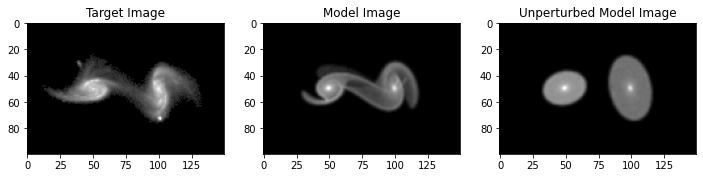

In [31]:
tParams = tInfo.getImageParams()
#gm.pprint(tParams)

tImg = tInfo.getTargetImage('zoo_2')
mImg = rInfo.getModelImage('zoo_2')
iImg = rInfo.getModelImage('zoo_2',initImg=True)

fig, ax = plt.subplots(1,3,figsize=(12,8))

ax[0].set_title("Target Image")
ax[0].imshow( tImg, cmap='gray' )

ax[1].set_title("Model Image")
ax[1].imshow(mImg,cmap='gray')

ax[2].set_title("Unperturbed Model Image")
ax[2].imshow(iImg,cmap='gray')

In [15]:

def plotMasks( imgs ):
    
    if len( imgs ) < 9:
        
        while( len(imgs ) ) < 9:
            imgs.append(np.zeros((2,2)))
            
    
    
    fig, ax = plt.subplots(3,3,figsize=(16,12))
    ax[0,0].set_title("Target Image")
    ax[0,0].imshow( imgs[0], cmap='gray' )
    ax[0,1].set_title("Model Image")
    ax[0,1].imshow( imgs[1], cmap='gray')
    ax[0,2].set_title("Unperturbed Model Image")
    ax[0,2].imshow( imgs[2], cmap='gray')
    
    ax[1,0].set_title("Mask Overlap Target Image")
    ax[1,0].imshow( imgs[3], cmap='gray' )
    ax[1,1].set_title("Mask Overlap Model Image")
    ax[1,1].imshow( imgs[4], cmap='gray')
    ax[1,2].set_title("Mask Overlap Unperturbed Model Image")
    ax[1,2].imshow( imgs[5], cmap='gray')
    
    ax[2,0].set_title("Masked Target Image")
    ax[2,0].imshow( imgs[6], cmap='gray', vmin=0, vmax=1.0 )
    ax[2,1].set_title("Masked Model Image")
    ax[2,1].imshow( imgs[7], cmap='gray', vmin=0, vmax=1.0)
    ax[2,2].set_title("Masked Unperturbed Model Image")
    ax[2,2].imshow( imgs[8], cmap='gray', vmin=0, vmax=1.0)

{'zoo_2': {'cmpArg': {'function_name': 'correlation',
                      'targetName': 'zoo_2',
                      'targetType': 'target_image',
                      'type': 'direct_image_comparison'},
           'imgArg': {'blur': {'size': 5,
                               'type': 'gaussian_blur',
                               'weight': 0.75},
                      'comment': 'Smaller '
                                 'Image '
                                 'by '
                                 'Matthew.',
                      'galaxy_centers': {'px': 50,
                                         'py': 50,
                                         'sx': 100,
                                         'sy': 50},
                      'image_size': {'height': 100,
                                     'width': 150},
                      'name': 'zoo_2',
                      'normalization': {'norm_constant': 2.5,
                                        'type': 'type1'},
      

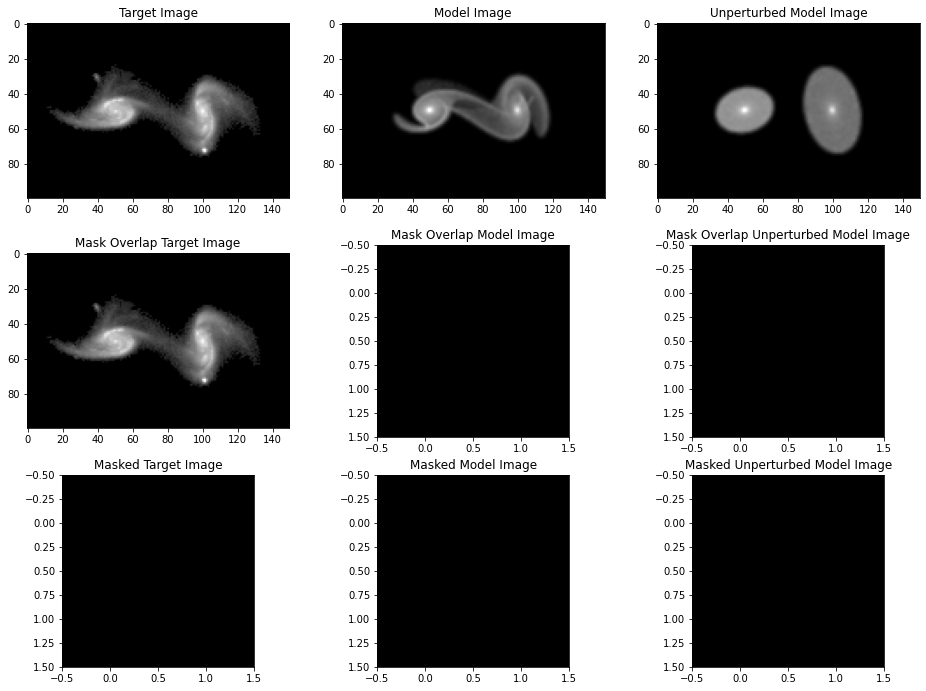

In [29]:
tImg = tInfo.getTargetImage( 'zoo_2' )
mImg = rInfo.getModelImage( 'zoo_2' )
iImg = rInfo.getModelImage( 'zoo_2', initImg=True )

maskIgnore = tInfo.readMaskRoi( 'mask_roi_zoo_0' )
tImgParams = tInfo.getImageParams()
zoo_2_param = gm.readJson( tInfo.infoDir + 'param_zoo_2.json' )


tInfo.addImageParams( zoo_2_param )

gm.pprint(zoo_2)

atImg = mc.addEllipse( tImg, maskIgnore['primary_start'] )


plotMasks( [ tImg, mImg, iImg, atImg ])

In [64]:

mask_params = {}
mask_name = 'mask_binary_1'
mask_params[mask_name] = deepcopy( tParams['zoo_2'] )
mask_params[mask_name]['name'] = mask_name
mask_params[mask_name]['cmpArg']['type'] = 'mask_binary_simple_compare'
mask_params[mask_name]['cmpArg']['mask'] = {}
mask_params[mask_name]['cmpArg']['mask']['name'] = mask_name
mask_params[mask_name]['cmpArg']['mask']['type'] = 'target'
mask_params[mask_name]['cmpArg']['brightness_match'] = 'match_average'

#gm.pprint(mask_params)

newScoreArgs = gm.inArgClass()
newScoreArgs.setArg( 'scoreParams', mask_params )
newScoreArgs.setArg( 'printAll', True )
newScoreArgs.setArg( 'newScore', True )
newScoreArgs.setArg( 'overWrite', True )

simr.simr_run( rInfo=rInfo, arg = newScoreArgs)
#rInfo.printScores()

SIMR.pipelineRun: Inputs
	 - rDir: None
	 - rInfo: <class 'Support_Code.info_module.run_info_class'>
SIMR.pipelineRun: 
	 - rInfo:  <Support_Code.info_module.run_info_class object at 0x7fd5bf824ac0>
MS: Run:
MS: scoreName: mask_binary_1
MS: mask_compare_setup: mask_binary_1
	 -  paramName: mask_binary_1
	 -  modelName: zoo_2
	 - targetName: zoo_2
	 -   maskName: mask_binary_1
	 - Read target image
	 - Read model image
	 - Read target mask
MS: mask_compare_setup: New Score!: mask_binary_1 - 0.647870 - 0.647870


In [65]:
mask_params = {}
mask_name = 'mask_binary_blank'
mask_params[mask_name] = deepcopy( tParams['zoo_2'] )
mask_params[mask_name]['cmpArg']['type'] = 'mask_binary_simple_compare'
mask_params[mask_name]['cmpArg']['mask'] = {}
mask_params[mask_name]['cmpArg']['mask']['name'] = 'mask_binary_1'
mask_params[mask_name]['cmpArg']['mask']['type'] = 'target'

i = 0

for name, func in dc.scoreFunctions:
    
    print(name)
    
    mask_name1 = 'mask_testing_%s_%s' % ( i, 'control_group' )
    mask_params[mask_name1] = deepcopy( tParams['zoo_2'] )
    mask_params[mask_name1]['name'] = mask_name1
    mask_params[mask_name1]['cmpArg']['function_name'] = name
    
    mask_name2 = 'mask_testing_%s_%s' % ( i, 'control_adjust' )
    mask_params[mask_name2] = deepcopy( tParams['zoo_2'] )
    mask_params[mask_name2]['name'] = mask_name2
    mask_params[mask_name2]['cmpArg']['function_name'] = name
    mask_params[mask_name2]['cmpArg']['brightness_match'] = 'match_total'
    
    mask_name3 = 'mask_testing_%s_%s' % ( i, 'masked' )
    mask_params[mask_name3] = deepcopy( mask_params['mask_binary_blank'] )
    mask_params[mask_name3]['name'] = mask_name3
    mask_params[mask_name3]['cmpArg']['function_name'] = name     

    mask_name4 = 'mask_testing_%s_%s' % ( i, 'masked_adjust' )
    mask_params[mask_name4] = deepcopy( mask_params['mask_binary_blank'] )
    mask_params[mask_name4]['name'] = mask_name4
    mask_params[mask_name4]['cmpArg']['function_name'] = name
    mask_params[mask_name4]['cmpArg']['brightness_match'] = 'match_total'  
    
    i+= 1
    
#gm.pprint(mask_params)

score_absolute_difference
score_absolute_difference_squared
score_binary_correlation
score_correlation
score_overlap_fraction
score_ssim
score_test_compare


In [66]:
tInfo.saveMaskImage( mask, 'mask_binary_1')

In [67]:
print(tInfo.scoreParamDir)
print(gm.validPath( tInfo.scoreParamDir) )

from os import listdir

listdir( tInfo.scoreParamDir )
tInfo.saveScoreParam( mask_params, 'binary_mask_testing_2' )
listdir( tInfo.scoreParamDir )

/home/mbo2d/587722984435351614/information/score_parameters/
/home/mbo2d/587722984435351614/information/score_parameters/


['binary_mask_testing_2.json',
 'binary_mask_testing.json',
 'binary_mask_testing_1.json']

In [68]:

newScoreArgs = gm.inArgClass()
newScoreArgs.setArg( 'scoreParams', mask_params )
newScoreArgs.setArg( 'printAll', False )
newScoreArgs.setArg( 'newImage', False )
newScoreArgs.setArg( 'newScore', True )
newScoreArgs.setArg( 'overWrite', True )

simr.simr_run( rInfo=rInfo, arg = newScoreArgs)
rInfo.printScores()

SIMR.pipelineRun: Inputs
	 - rDir: None
	 - rInfo: <class 'Support_Code.info_module.run_info_class'>
SIMR.pipelineRun: 
	 - rInfo:  <Support_Code.info_module.run_info_class object at 0x7fd5bf824ac0>
MS: Run:
IM: run_info_class.printScores()
	 - run_id: r00000
	 - zoo_merger: 0.945946
	 - machine_scores: 84
	 - zoo_test: 0.843128
	 - zoo_0: 0.753202
	 - zoo_test_3: 0.828484
	 - new_score: 0.941951
	 - zoo_2: 0.647870
	 - mask_binary_0: 0.376678
	 - mask_testing_0_0: 0.972033
	 - mask_testing_0_1: 0.969733
	 - mask_testing_0_2: 0.969733
	 - mask_testing_1_0: 0.994117
	 - mask_testing_1_1: 0.993195
	 - mask_testing_1_2: 0.993195
	 - mask_testing_2_0: 0.649091
	 - mask_testing_2_1: 0.653715
	 - mask_testing_2_2: 0.653715
	 - mask_testing_3_0: 0.846133
	 - mask_testing_3_1: 0.846133
	 - mask_testing_3_2: 0.846133
	 - mask_testing_4_0: 0.520040
	 - mask_testing_4_1: 0.524402
	 - mask_testing_4_2: 0.524402
	 - mask_testing_5_0: 0.807278
	 - mask_testing_5_1: 0.801603
	 - mask_testing_5_2: 0.8

0 - cmpFunc: score_absolute_difference
1 - cmpFunc: score_absolute_difference_squared
2 - cmpFunc: score_binary_correlation
3 - cmpFunc: score_correlation
4 - cmpFunc: score_overlap_fraction
5 - cmpFunc: score_ssim


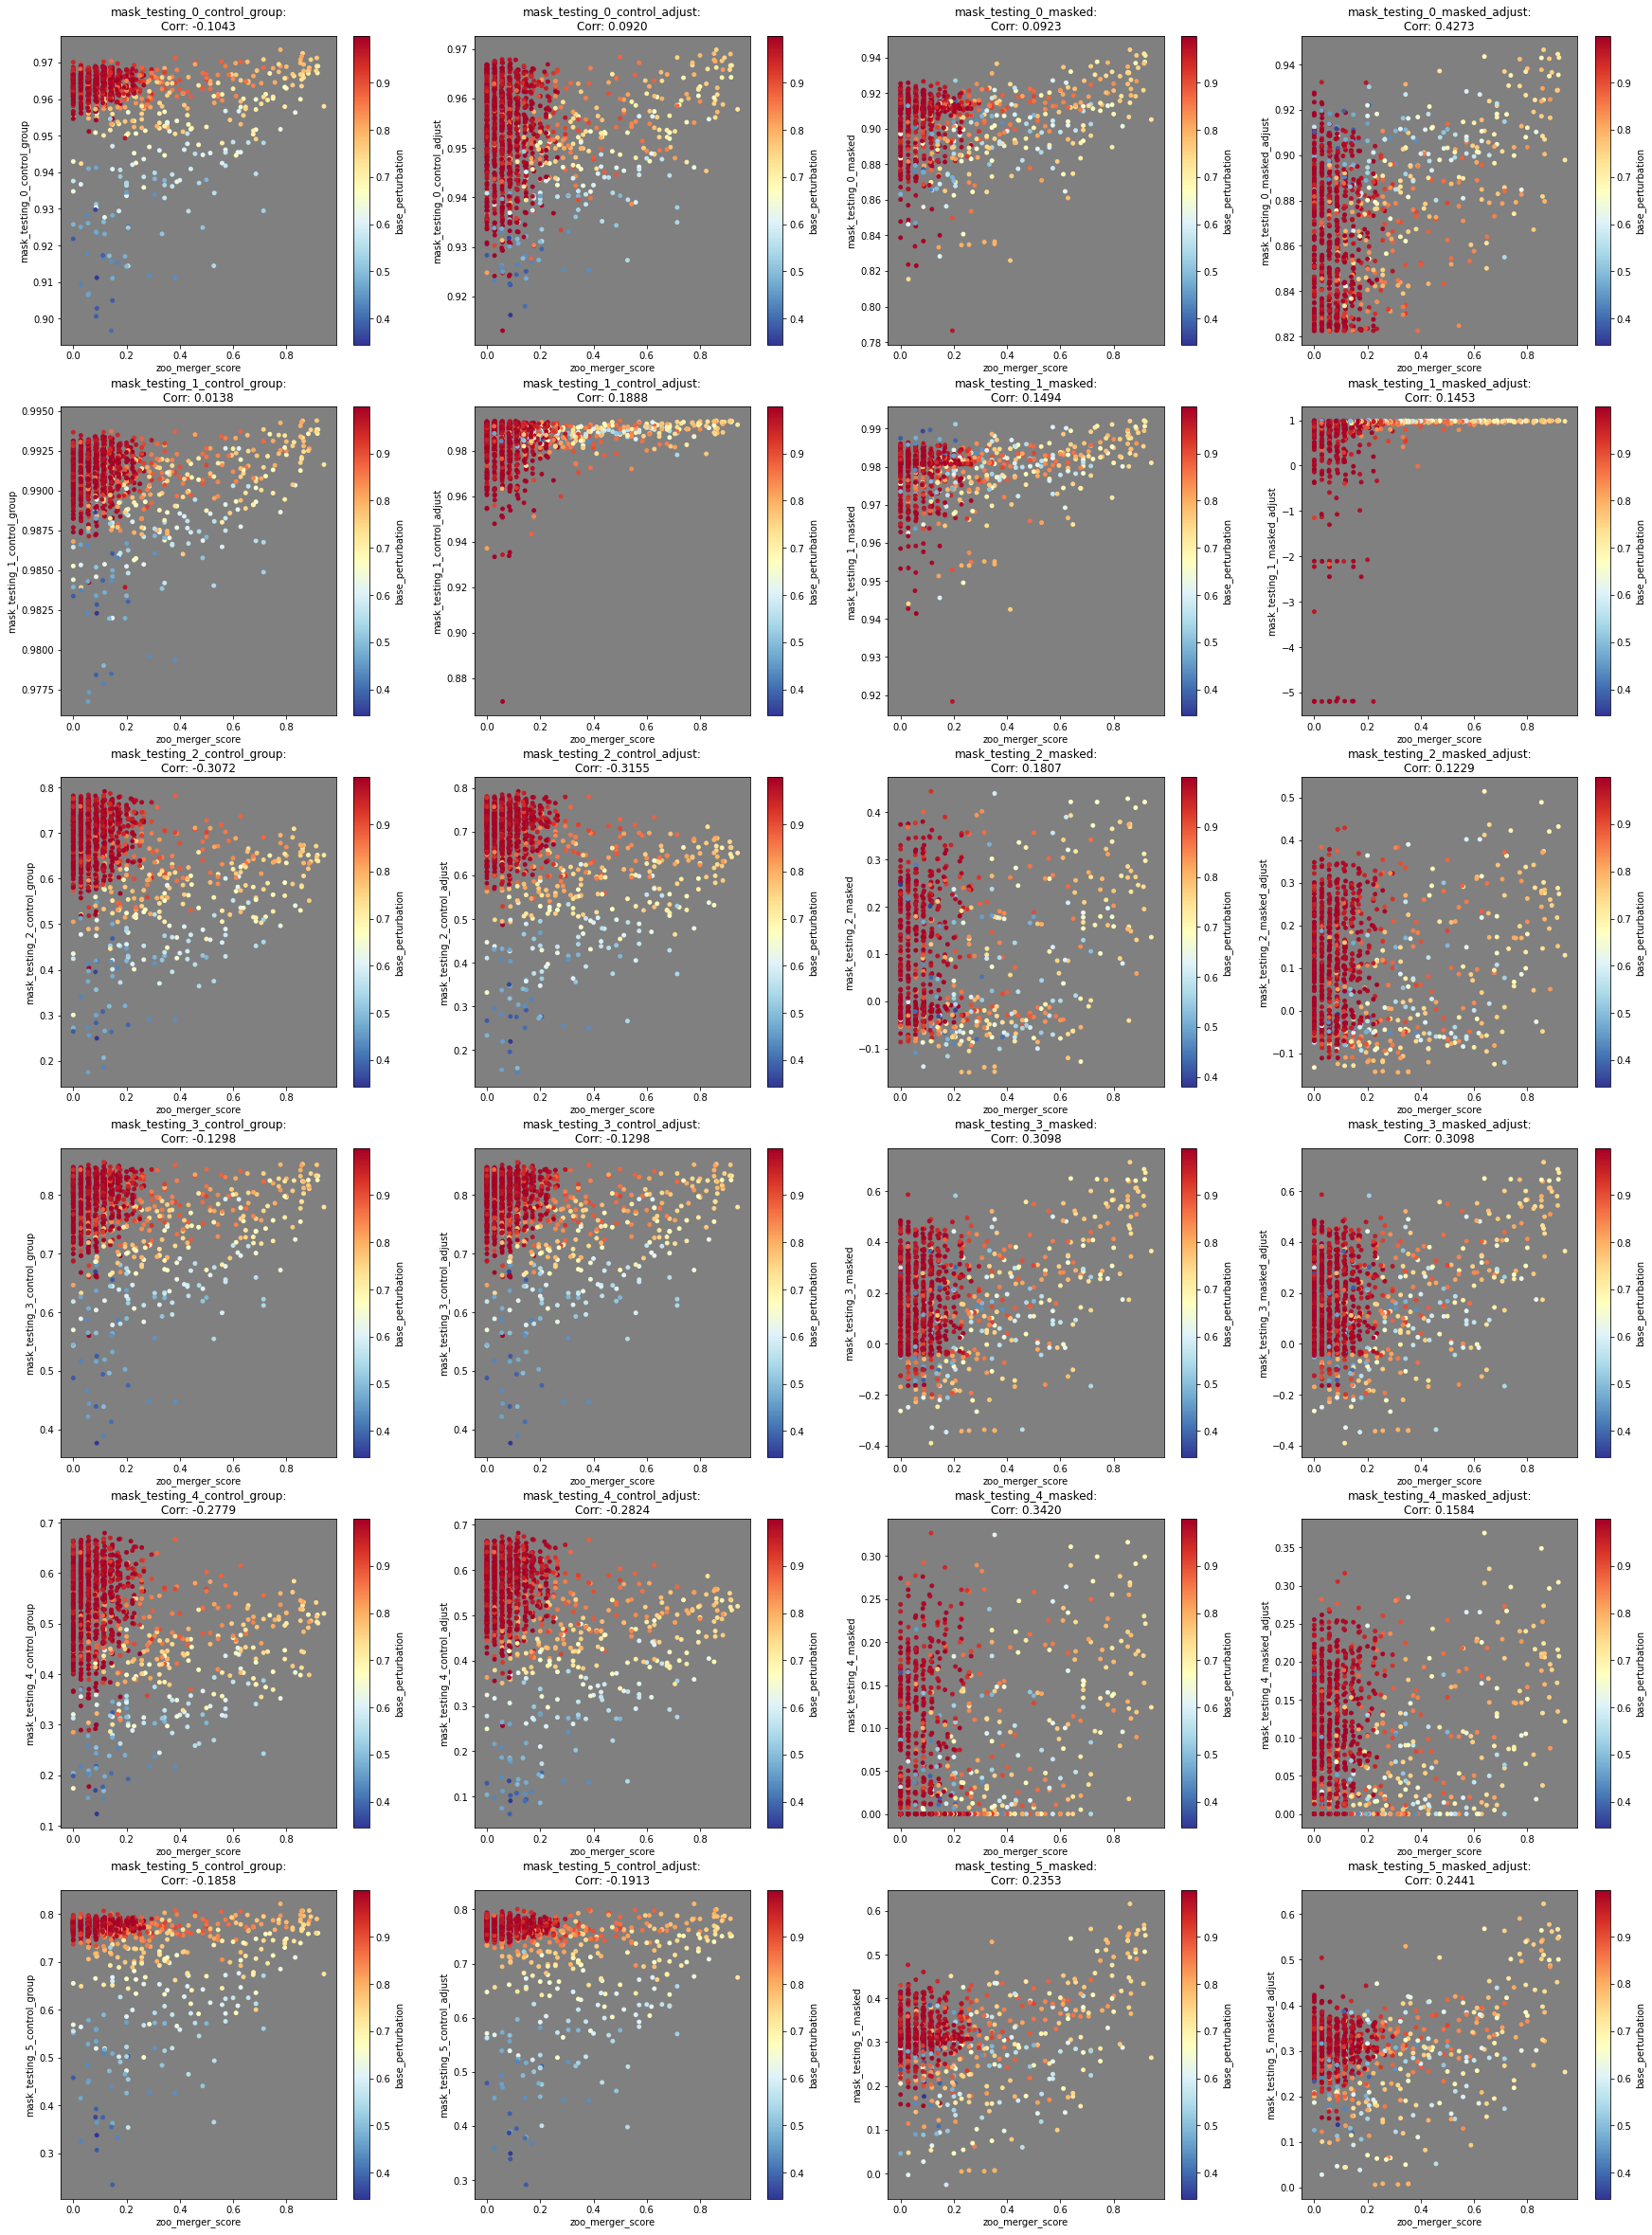

In [69]:
scores = tInfo.getScores(reload=True)

fig, ax = plt.subplots(6,4,figsize=(30,42))

for i in range(6):
    print( '%d - cmpFunc: %s' % (i, mask_params['mask_testing_%d_control_group'%i]['cmpArg']['function_name']) )
    sa.getNamedPlot( scores=scores, sName='mask_testing_%d_control_group'%i, fig=fig, ax=ax[i,0])
    sa.getNamedPlot( scores=scores, sName='mask_testing_%d_control_adjust'%i, fig=fig, ax=ax[i,1])
    sa.getNamedPlot( scores=scores, sName='mask_testing_%d_masked'%i, fig=fig, ax=ax[i,2])
    sa.getNamedPlot( scores=scores, sName='mask_testing_%d_masked_adjust'%i, fig=fig, ax=ax[i,3])